### Import Nationscape

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

In [2]:
nationscape = pd.read_excel("ns20210121_parallel_dataset.xlsx")
print(nationscape.head(n=1))

  response_id          start_date                              right_track  \
0   P00300004 2021-01-21 08:38:30  Generally headed in the right direction   

   economy_better          interest registration news_sources_facebook  \
0  About the same  Some of the time   Registered                   Yes   

  news_sources_cnn news_sources_msnbc news_sources_fox  ... census_region  \
0              Yes                Yes              Yes  ...         South   

         hispanic race_ethnicity household_income         education state  \
0  Other Hispanic          White              NaN  Associate Degree    LA   

  congress_district    weight weight_2020 weight_both  
0              LA01  1.105557     1.63906    2.314986  

[1 rows x 224 columns]


### Update certain Nationscape values

In [3]:
# update household_income from choice (from codebook) to value matching index of choice in list (0-indexed)

household_income_choices = ['Less than $14,999', '$15,000 to $19,999', '$20,000 to $24,999', '$25,000 to $29,999', 
                            '$30,000 to $34,999', '$35,000 to $39,999', '$40,000 to $44,999', '$45,000 to $49,999', 
                            '$50,000 to $54,999', '$55,000 to $59,999', '$60,000 to $64,999', '$65,000 to $69,999', 
                            '$70,000 to $74,999', '$75,000 to $79,999', '$80,000 to $84,999', '$85,000 to $89,999',
                            '$90,000 to $94,999', '$95,000 to $99,999', '$100,000 to $124,999', 
                            '$125,000 to $149,999', '$150,000 to $174,999', '$175,000 to $199,999', 
                            '$200,000 to $249,999', '$250,000 and above']
household_income_values = [i for i in range(len(household_income_choices))]

nationscape['household_income'] = nationscape['household_income'].replace(household_income_choices, household_income_values)
# verify this update has caught everything
print(nationscape.household_income.unique())

[nan 22. 20. 17. 11. 18. 16.  5.  1. 13.  8. 14.  6. 10.  3.  7. 15.  2.
 19.  4. 21.  9.  0. 23. 12.]


In [4]:
# update vote_2016, vote_2020_retro, and house_intent_retro from choice to political party 
# or None if did not vote, didn't recall, not asked, etc.

vote_2016_choices_to_parties = {'Hillary Clinton': 'Democrat', 'Donald Trump': 'Republican', 
                                'Did not vote, but was eligible': None, 'Jill Stein': 'Other party', 
                                'Gary Johnson': 'Other party', 'Someone else:': 'Other party', 
                                'Was not eligible to vote': None, "Don't recall": None}
nationscape['vote_2016'] = nationscape['vote_2016'].replace(vote_2016_choices_to_parties)
print(nationscape.vote_2016.unique())

vote_2020_retro_choices_to_parties = {'Donald Trump': 'Republican', 'Joe Biden': 'Democrat', 'Not Asked': None,
                                      "I don't recall": None, 'Someone else:': 'Other party', 'I abstained': None}
nationscape['vote_2020_retro'] = nationscape['vote_2020_retro'].replace(vote_2020_retro_choices_to_parties)
print(nationscape.vote_2020_retro.unique())

house_intent_retro_choices_to_parties = {'The Republican candidate': 'Republican', 
                                         'The Democratic candidate': 'Democrat', "Don't Know": None, 
                                         'I did not vote in this race in 2020': None, 'Other': 'Other party'}
nationscape['house_intent_retro'] = nationscape['house_intent_retro'].replace(house_intent_retro_choices_to_parties)
print(nationscape.house_intent_retro.unique())

['Democrat' 'Republican' None 'Other party']
['Republican' 'Democrat' None 'Other party' nan]
['Republican' 'Democrat' None 'Other party' nan]


In [5]:
# update ideo5 from choice to 1-5 Very Liberal-Very Conservative scale, where Not Sure is None

ideo5_choice_to_scale = {'Very Liberal': 1, 'Liberal': 2, 'Moderate': 3, 'Conservative': 4, 'Very Conservative': 5, 
                         'Not Sure': None}
nationscape['ideo5'] = nationscape['ideo5'].replace(ideo5_choice_to_scale)
print(nationscape.ideo5.unique())

[ 3.  4.  5.  2.  1. nan]


In [6]:
# update mctaxes, raise_upper_tax, minwage, group_favorability_blacks, group_favorability_lgbt, 
# political_correctness, fc_trad_val, statements_protect_traditions, statements_christianity_assault,  
# statements_gender_identity, group_favorability_republicans, and group_favorability_democrats
# from choice to 1-5 Very Liberal-Very Conservative scale

# Not Sure/Not Asked/Haven't heard enough/etc. is always None
# with 2 Agree/Disagree-type options, they are 2 (Liberal) and 4 (Conservative), depending on the question
# with 4 Very favorable/Somewhat favorable/Somewhat unfavorable/Very unfavorable-type options, they are 1 (Very 
# Liberal), 2 (Liberal), 4 (Conservative), and 5 (Very Conservative), with order depending on the question

# mctaxes: We’d like to know whether you agree or disagree with each of the following policies: 
# - Cut taxes for families making less than $100,000 per year
mctaxes_choice_to_scale = {'Agree': 2, 'Disagree': 4, 'Not Sure': None}
nationscape['mctaxes'] = nationscape['mctaxes'].replace(mctaxes_choice_to_scale)
print(nationscape.mctaxes.unique())

# raise_upper_tax: We’d like to know whether you agree or disagree with each of the following policies: 
# - Raise taxes on families making over $600,000
raise_upper_tax_choice_to_scale = {'Agree': 2, 'Disagree': 4, 'Not Sure': None}
nationscape['raise_upper_tax'] = nationscape['raise_upper_tax'].replace(raise_upper_tax_choice_to_scale)
print(nationscape.raise_upper_tax.unique())

# minwage: Finally, what about these policies? - Raise the minimum wage to $15/hour
minwage_choice_to_scale = {'Agree': 2, 'Disagree': 4, 'Not sure': None}
nationscape['minwage'] = nationscape['minwage'].replace(minwage_choice_to_scale)
print(nationscape.minwage.unique())

# group_favorability_blacks: Here are the names of some groups that are in the news from time to time. 
# How favorable is your impression of each group or haven’t you heard enough to say? - Blacks
group_favorability_blacks_choice_to_scale = {'Very favorable': 1, 'Somewhat favorable': 2, 'Somewhat unfavorable': 4, 
                                             'Very unfavorable': 5, "Haven't heard enough": None}
nationscape['group_favorability_blacks'] = nationscape['group_favorability_blacks'].replace(group_favorability_blacks_choice_to_scale)
print(nationscape.group_favorability_blacks.unique())

# group_favorability_lgbt: Here are the names of some groups that are in the news from time to time. 
# How favorable is your impression of each group or haven’t you heard enough to say? - Gays and Lesbians
group_favorability_lgbt_choice_to_scale = {'Very favorable': 1, 'Somewhat favorable': 2, 'Somewhat unfavorable': 4, 
                                           'Very unfavorable': 5, "Haven't heard enough": None}
nationscape['group_favorability_lgbt'] = nationscape['group_favorability_lgbt'].replace(group_favorability_lgbt_choice_to_scale)
print(nationscape.group_favorability_lgbt.unique())

# political_correctness: And what about these policies? - End the culture of political correctness
political_correctness_choice_to_scale = {'Agree': 4, 'Disagree': 2, 'Not Sure': None}
nationscape['political_correctness'] = nationscape['political_correctness'].replace(political_correctness_choice_to_scale)
print(nationscape.political_correctness.unique())

# fc_trad_val: And how about these:
fc_trad_val_choice_to_scale = {'The government should promote traditional family values in our society': 4, 
                               'The government should not promote traditional family values in our society': 2}
nationscape['fc_trad_val'] = nationscape['fc_trad_val'].replace(fc_trad_val_choice_to_scale)
print(nationscape.fc_trad_val.unique())

# statements_protect_traditions: Please tell us how much you agree or disagree with the following statements. 
# - Politicians should do more to protect America’s way of life
statements_protect_traditions_choice_to_scale = {'Strongly Agree': 5, 'Somewhat Agree': 4, 'Somewhat Disagree': 2,
                                                 'Strongly Disagree': 1, 'Not sure': None}
nationscape['statements_protect_traditions'] = nationscape['statements_protect_traditions'].replace(statements_protect_traditions_choice_to_scale)
print(nationscape.statements_protect_traditions.unique())

# statements_christianity_assault: Please tell us how much you agree or disagree with the following statements. 
# - Traditional Christian religious beliefs are under assault
statements_christianity_assault_choice_to_scale = {'Strongly Agree': 5, 'Somewhat Agree': 4, 'Somewhat Disagree': 2,
                                                   'Strongly Disagree': 1, 'Not sure': None, 'Not Asked': None}
nationscape['statements_christianity_assault'] = nationscape['statements_christianity_assault'].replace(statements_christianity_assault_choice_to_scale)
print(nationscape.statements_christianity_assault.unique())

# statements_gender_identity: Please tell us how much you agree or disagree with the following statements. 
# - There are only two genders, male and female
statements_gender_identity_choice_to_scale = {'Strongly Agree': 5, 'Somewhat Agree': 4, 'Somewhat Disagree': 2,
                                              'Strongly Disagree': 1, 'Not sure': None, 'Not Asked': None}
nationscape['statements_gender_identity'] = nationscape['statements_gender_identity'].replace(statements_gender_identity_choice_to_scale)
print(nationscape.statements_gender_identity.unique())

# group_favorability_republicans: Here are the names of some groups that are in the news from time to time. 
# How favorable is your impression of each group or haven’t you heard enough to say? - Republicans
group_favorability_republicans_choice_to_scale = {'Very favorable': 5, 'Somewhat favorable': 4, 
                                                  'Somewhat unfavorable': 2, 'Very unfavorable': 1, 
                                                  "Haven't heard enough": None}
nationscape['group_favorability_republicans'] = nationscape['group_favorability_republicans'].replace(group_favorability_republicans_choice_to_scale)
print(nationscape.group_favorability_republicans.unique())

# group_favorability_democrats: Here are the names of some groups that are in the news from time to time. 
# How favorable is your impression of each group or haven’t you heard enough to say? - Democrats
group_favorability_democrats_choice_to_scale = {'Very favorable': 1, 'Somewhat favorable': 2, 
                                                'Somewhat unfavorable': 4, 'Very unfavorable': 5, 
                                                "Haven't heard enough": None}
nationscape['group_favorability_democrats'] = nationscape['group_favorability_democrats'].replace(group_favorability_democrats_choice_to_scale)
print(nationscape.group_favorability_democrats.unique())

[nan  2.  4.]
[nan  2.  4.]
[nan  2.  4.]
[nan  2.  1.  4.  5.]
[nan  2.  5.  1.  4.]
[nan  2.  4.]
[ 4.  2. nan]
[nan  5.  4.  2.  1.]
[nan  2.  1.  5.  4.]
[nan  5.  1.  4.  2.]
[nan  5.  4.  1.  2.]
[nan  4.  5.  2.  1.]


In [7]:
# update education from choice to wider ranges

education_choice_widen = {'3rd Grade or less': 'Middle school', 'Middle School - Grades 4 - 8': 'Middle school', 
                          'Completed some high school': 'High school', 'High school graduate': 'High school', 
                          'Other post high school vocational training': 'College', 
                          'Completed some college, but no degree': 'College', 'Associate Degree': 'College', 
                          'College Degree (such as B.A., B.S.)': 'College', 
                          'Completed some graduate, but no degree': 'Graduate school', 
                          'Masters degree': 'Graduate school', 'Doctorate degree': 'Graduate school'}
nationscape['education'] = nationscape['education'].replace(education_choice_widen)
print(nationscape.education.unique())

['College' 'Graduate school' 'High school' 'Middle school']


### Create Bay Area and other areas voter groups

In [8]:
# create Bay Area group
# congress_district: CA 13, 05, 03, 11, 15, 19, 17, 18, 14, and 12

bay_area_congress_districts = ['CA13', 'CA05', 'CA03', 'CA11', 'CA15', 'CA19', 'CA17', 'CA18', 'CA14', 'CA12']
bay_area_group = nationscape[nationscape['congress_district'].isin(bay_area_congress_districts)]
print(str(bay_area_group.shape[0]) + " voters in Bay Area group")

177 voters in Bay Area group


In [9]:
# calculate Bay Area group's median household_income value

bay_area_group_household_income_value_mean = bay_area_group.household_income.median(skipna=True)
print("Bay Area group has median household_income " + str(bay_area_group_household_income_value_mean) + " or " + 
     household_income_choices[int(bay_area_group_household_income_value_mean)])

Bay Area group has median household_income 14.0 or $80,000 to $84,999


In [10]:
# create other areas group
# state: AZ, FL, GA, IA, MI, MN, NV, NH, NC, OH, PA, TX, and WI
# household_income: >= Bay Area group's average

swing_states = ['AZ', 'FL', 'GA', 'IA', 'MI', 'MN', 'NV', 'NH', 'NC', 'OH', 'PA', 'TX', 'WI']
other_areas_group = nationscape[nationscape['state'].isin(swing_states)]
other_areas_group = other_areas_group[other_areas_group['household_income'] >= bay_area_group_household_income_value_mean]
print(str(other_areas_group.shape[0]) + " voters in other areas group")

973 voters in other areas group


### Verify Bay Area group dependably votes Democrat

,pid3
Democrat,102
Independent,41
Republican,29
Something else,4


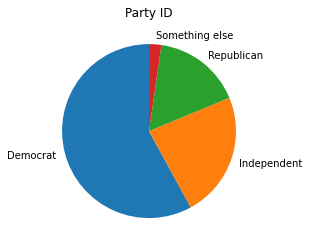

In [31]:
# pid3: verify that Bay Area group mostly identifies with the Democratic party

pid3_value_counts = bay_area_group['pid3'].value_counts()
pid3_df = pd.DataFrame(data=pid3_value_counts)
display(pid3_df)

plt.pie(list(pid3_value_counts), labels=pid3_value_counts.index.tolist(), startangle=90)
plt.title("Party ID")
plt.show() 

,vote_2016
Democrat,87
Republican,33
Other party,8


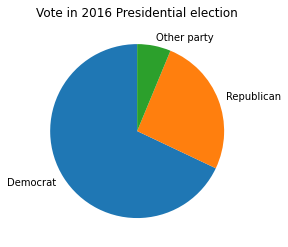

,vote_2020_retro
Democrat,104
Republican,29
Other party,3


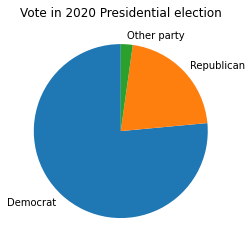

,house_intent_retro
Democrat,111
Republican,31
Other party,3


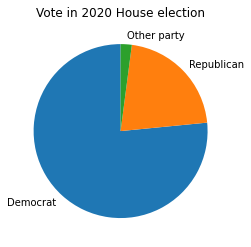

Not Asked    177
Name: senate_intent_retro, dtype: int64

Not Asked    177
Name: governor_intent_retro, dtype: int64


In [32]:
# verify that Bay Area group — out of those who voted — mostly votes Democrat
# vote_2016, vote_2020_retro, house_intent_retro, senate_intent_retro, governor_intent_retro

vote_2016_value_counts = bay_area_group['vote_2016'].value_counts()
vote_2016_df = pd.DataFrame(data=vote_2016_value_counts)
display(vote_2016_df)

plt.pie(list(vote_2016_value_counts), labels=vote_2016_value_counts.index.tolist(), startangle=90)
plt.title("Vote in 2016 Presidential election")
plt.show() 

vote_2020_retro_value_counts = bay_area_group['vote_2020_retro'].value_counts()
vote_2020_retro_df = pd.DataFrame(data=vote_2020_retro_value_counts)
display(vote_2020_retro_df)

plt.pie(list(vote_2020_retro_value_counts), labels=vote_2020_retro_value_counts.index.tolist(), startangle=90)
plt.title("Vote in 2020 Presidential election")
plt.show() 

house_intent_retro_value_counts = bay_area_group['house_intent_retro'].value_counts()
house_intent_retro_df = pd.DataFrame(data=house_intent_retro_value_counts)
display(house_intent_retro_df)

plt.pie(list(house_intent_retro_value_counts), labels=house_intent_retro_value_counts.index.tolist(), startangle=90)
plt.title("Vote in 2020 House election")
plt.show() 

print(bay_area_group['senate_intent_retro'].value_counts())
print()

print(bay_area_group['governor_intent_retro'].value_counts())

### Create operationalizations of relevant variables for both groups

In [13]:
# operationalize identity-based ideology
# create means for both groups
# ideo5

bay_area_group_identity_ideo_mean = bay_area_group.ideo5.mean(skipna=True)
print("Bay Area group has mean identity-based ideology " + str(bay_area_group_identity_ideo_mean))

other_areas_group_identity_ideo_mean = other_areas_group.ideo5.mean(skipna=True)
print("other areas group has mean identity-based ideology " + str(other_areas_group_identity_ideo_mean))

Bay Area group has mean identity-based ideology 2.6863905325443787
other areas group has mean identity-based ideology 3.1319957761351636


In [14]:
# operationalize economic issue-based ideology
# create means for both groups
# mctaxes, raise_upper_tax, and minwage

bay_area_group_econ_issue_ideo_scale = [bay_area_group.mctaxes.mean(skipna=True), 
                                        bay_area_group.raise_upper_tax.mean(skipna=True),
                                        bay_area_group.minwage.mean(skipna=True)]
bay_area_group_econ_issue_ideo_mean = sum(bay_area_group_econ_issue_ideo_scale) / len(bay_area_group_econ_issue_ideo_scale)
print("Bay Area group has mean economic issue-based ideology " + str(bay_area_group_econ_issue_ideo_mean))

other_areas_group_econ_issue_ideo_scale = [other_areas_group.mctaxes.mean(skipna=True), 
                                           other_areas_group.raise_upper_tax.mean(skipna=True),
                                           other_areas_group.minwage.mean(skipna=True)]
other_areas_group_econ_issue_ideo_mean = sum(other_areas_group_econ_issue_ideo_scale) / len(other_areas_group_econ_issue_ideo_scale)
print("other areas group has mean economic issue-based ideology " + str(other_areas_group_econ_issue_ideo_mean))

Bay Area group has mean economic issue-based ideology 2.374788656323123
other areas group has mean economic issue-based ideology 2.6754727642678766


In [15]:
# operationalize cultural issue-based ideology
# create means for both groups
# group_favorability_blacks, group_favorability_lgbt, political_correctness, fc_trad_val, 
# statements_protect_traditions, statements_christianity_assault, and statements_gender_identity

bay_area_group_cult_issue_ideo_scale = [bay_area_group.group_favorability_blacks.mean(skipna=True), 
                                        bay_area_group.group_favorability_lgbt.mean(skipna=True),
                                        bay_area_group.political_correctness.mean(skipna=True), 
                                        bay_area_group.fc_trad_val.mean(skipna=True),
                                        bay_area_group.statements_protect_traditions.mean(skipna=True),
                                        bay_area_group.statements_christianity_assault.mean(skipna=True),
                                        bay_area_group.statements_gender_identity.mean(skipna=True)]
bay_area_group_cult_issue_ideo_mean = sum(bay_area_group_cult_issue_ideo_scale) / len(bay_area_group_cult_issue_ideo_scale)
print("Bay Area group has mean cultural issue-based ideology " + str(bay_area_group_cult_issue_ideo_mean))

other_areas_group_cult_issue_ideo_scale = [other_areas_group.group_favorability_blacks.mean(skipna=True), 
                                           other_areas_group.group_favorability_lgbt.mean(skipna=True),
                                           other_areas_group.political_correctness.mean(skipna=True),
                                           other_areas_group.fc_trad_val.mean(skipna=True),
                                           other_areas_group.statements_protect_traditions.mean(skipna=True),
                                           other_areas_group.statements_christianity_assault.mean(skipna=True),
                                           other_areas_group.statements_gender_identity.mean(skipna=True)]
other_areas_group_cult_issue_ideo_mean = sum(other_areas_group_cult_issue_ideo_scale) / len(other_areas_group_cult_issue_ideo_scale)
print("other areas group has mean cultural issue-based ideology " + str(other_areas_group_cult_issue_ideo_mean))

Bay Area group has mean cultural issue-based ideology 2.7963187691078586
other areas group has mean cultural issue-based ideology 3.084698507291992


In [16]:
# operationalize issue-based ideology
# create means (of economic issue-based ideology and cultural issue-based ideology) for both groups

bay_area_group_issue_ideo_mean = (bay_area_group_econ_issue_ideo_mean + bay_area_group_cult_issue_ideo_mean) / 2
print("Bay Area group has mean issue-based ideology " + str(bay_area_group_issue_ideo_mean))

other_areas_group_issue_ideo_mean = (other_areas_group_econ_issue_ideo_mean + other_areas_group_cult_issue_ideo_mean) / 2
print("other areas group has mean issue-based ideology " + str(other_areas_group_issue_ideo_mean))

Bay Area group has mean issue-based ideology 2.585553712715491
other areas group has mean issue-based ideology 2.8800856357799343


In [17]:
# operationalize social norms
# create means for both groups
# group_favorability_republicans and group_favorability_democrats

bay_area_group_social_norms_scale = [bay_area_group.group_favorability_republicans.mean(skipna=True),
                                     bay_area_group.group_favorability_democrats.mean(skipna=True)]
bay_area_group_social_norms_mean = sum(bay_area_group_social_norms_scale) / len(bay_area_group_social_norms_scale)
print("Bay Area group has mean social norms " + str(bay_area_group_social_norms_mean))

other_areas_group_social_norms_scale = [other_areas_group.group_favorability_republicans.mean(skipna=True), 
                                        other_areas_group.group_favorability_democrats.mean(skipna=True)]
other_areas_group_social_norms_mean = sum(other_areas_group_social_norms_scale) / len(other_areas_group_social_norms_scale)
print("other areas group has mean social norms " + str(other_areas_group_social_norms_mean))

Bay Area group has mean social norms 2.449595332204028
other areas group has mean social norms 2.9225610318888737


### Evaluate hypotheses

In [18]:
# H1: Voters in the Bay Area vote Democrat not according to their issue-based ideology, 
# but according to an identity-based ideology based on social norms of the Bay Area being liberal and voting Democrat. 

# If |identity-based mean – issue-based mean| is greater for Bay Area group than other areas group, 
# and |identity-based mean – social norms| is less than for Bay Area group than other areas group

print("difference in identity-based ideology and issue-based ideology")
print("Bay Area: " + str(abs(bay_area_group_identity_ideo_mean - bay_area_group_issue_ideo_mean)))
print("other areas: " + str(abs(other_areas_group_identity_ideo_mean - other_areas_group_issue_ideo_mean)))
print(abs(bay_area_group_identity_ideo_mean - bay_area_group_issue_ideo_mean) > abs(other_areas_group_identity_ideo_mean - other_areas_group_issue_ideo_mean))
print()

print("difference in identity-based ideology and social norms")
print("Bay Area: " + str(abs(bay_area_group_identity_ideo_mean - bay_area_group_social_norms_mean)))
print("other areas: " + str(abs(other_areas_group_identity_ideo_mean - other_areas_group_social_norms_mean)))
print(abs(bay_area_group_identity_ideo_mean - bay_area_group_social_norms_mean) < abs(other_areas_group_identity_ideo_mean - other_areas_group_social_norms_mean))

difference in identity-based ideology and issue-based ideology
Bay Area: 0.10083681982888759
other areas: 0.2519101403552293
False

difference in identity-based ideology and social norms
Bay Area: 0.23679520034035084
other areas: 0.20943474424628983
False


In [19]:
# H2 (alternative): Voters in the Bay Area vote according to issue-based ideology, but on the cultural axis. 
# They are economically conservative but culturally liberal, so they vote Democrat.

# If cultural issue-based mean more liberal for Bay Area group than other areas group, 
# and |cultural issue-based mean – economic issue-based mean| is greater for the Bay Area group than other areas group

print("cultural issue-based ideology")
print("Bay Area: " + str(bay_area_group_cult_issue_ideo_mean))
print("other areas: " + str(other_areas_group_cult_issue_ideo_mean))
print(bay_area_group_cult_issue_ideo_mean < other_areas_group_cult_issue_ideo_mean)
print()

print("difference in cultural issue-based ideology and economic issue-based ideology")
print("Bay Area: " + str(abs(bay_area_group_cult_issue_ideo_mean - bay_area_group_econ_issue_ideo_mean)))
print("other areas: " + str(abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean)))
print(abs(bay_area_group_cult_issue_ideo_mean - bay_area_group_econ_issue_ideo_mean) > abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean))

cultural issue-based ideology
Bay Area: 2.7963187691078586
other areas: 3.084698507291992
True

difference in cultural issue-based ideology and economic issue-based ideology
Bay Area: 0.4215301127847355
other areas: 0.4092257430241153
True


In [20]:
hyp_data = {'identity-based ideology': [bay_area_group_identity_ideo_mean, other_areas_group_identity_ideo_mean], 
            'economic issue-based ideology': [bay_area_group_econ_issue_ideo_mean, other_areas_group_econ_issue_ideo_mean], 
            'cultural issue-based ideology': [bay_area_group_cult_issue_ideo_mean, other_areas_group_cult_issue_ideo_mean], 
            'issue-based ideology': [bay_area_group_issue_ideo_mean, other_areas_group_issue_ideo_mean],
            'social norms': [bay_area_group_social_norms_mean, other_areas_group_social_norms_mean], 
            'difference in identity-based and issue-based ideology': [abs(bay_area_group_identity_ideo_mean - bay_area_group_issue_ideo_mean), abs(other_areas_group_identity_ideo_mean - other_areas_group_issue_ideo_mean)],
            'difference in identity-based ideology and social norms': [abs(bay_area_group_identity_ideo_mean - bay_area_group_social_norms_mean), abs(other_areas_group_identity_ideo_mean - other_areas_group_social_norms_mean)], 
            'difference in cultural and economic issue-based ideology': [abs(bay_area_group_cult_issue_ideo_mean - bay_area_group_econ_issue_ideo_mean), abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean)]}

hyp_df = pd.DataFrame(data=hyp_data, index=['Bay Area group', 'other areas group'])
display(hyp_df.round(3))

,identity-based ideology,economic issue-based ideology,cultural issue-based ideology,issue-based ideology,social norms,difference in identity-based and issue-based ideology,difference in identity-based ideology and social norms,difference in cultural and economic issue-based ideology
Bay Area group,2.686,2.375,2.796,2.586,2.450,0.101,0.237,0.422
other areas group,3.132,2.675,3.085,2.880,2.923,0.252,0.209,0.409


### Control within hypotheses

In [21]:
# define functions to calculate operationalization means for specific groups

def identity_ideo(group):
    return group.ideo5.mean(skipna=True)

def econ_issue_ideo(group):
    group_econ_issue_ideo_scale = [group.mctaxes.mean(skipna=True),
                                   group.raise_upper_tax.mean(skipna=True),
                                   group.minwage.mean(skipna=True)]
    return sum(group_econ_issue_ideo_scale) / len(group_econ_issue_ideo_scale)

def cult_issue_ideo(group):
    group_cult_issue_ideo_scale = [group.group_favorability_blacks.mean(skipna=True),
                                   group.group_favorability_lgbt.mean(skipna=True),
                                   group.political_correctness.mean(skipna=True), 
                                   group.fc_trad_val.mean(skipna=True),
                                   group.statements_protect_traditions.mean(skipna=True),
                                   group.statements_christianity_assault.mean(skipna=True),
                                   group.statements_gender_identity.mean(skipna=True)]
    return sum(group_cult_issue_ideo_scale) / len(group_cult_issue_ideo_scale)

def issue_ideo(group):
    return (econ_issue_ideo(group) + cult_issue_ideo(group)) / 2

def social_norms(group):
    group_social_norms_scale = [group.group_favorability_republicans.mean(skipna=True),
                                group.group_favorability_democrats.mean(skipna=True)]
    return sum(group_social_norms_scale) / len(group_social_norms_scale)

In [22]:
# H1, liberal elites and media

# subdivide each of Bay Area and other area into 4 groups: yes MSNBC + yes Fox, yes MSNBC + no Fox, 
# no MSNBC + yes Fox, no MSNBC + no Fox
# msnbc is liberal, fox is conservative

bay_area_msnbc_fox_group = bay_area_group[bay_area_group['news_sources_msnbc'] == 'Yes']
bay_area_msnbc_fox_group = bay_area_msnbc_fox_group[bay_area_msnbc_fox_group['news_sources_fox'] == 'Yes']
bay_area_msnbc_group = bay_area_group[bay_area_group['news_sources_msnbc'] == 'Yes']
bay_area_msnbc_group = bay_area_msnbc_group[bay_area_msnbc_group['news_sources_fox'] == 'No']
bay_area_fox_group = bay_area_group[bay_area_group['news_sources_msnbc'] == 'No']
bay_area_fox_group = bay_area_fox_group[bay_area_fox_group['news_sources_fox'] == 'Yes']
bay_area_none_group = bay_area_group[bay_area_group['news_sources_msnbc'] == 'No']
bay_area_none_group = bay_area_none_group[bay_area_none_group['news_sources_fox'] == 'No']

other_areas_msnbc_fox_group = other_areas_group[other_areas_group['news_sources_msnbc'] == 'Yes']
other_areas_msnbc_fox_group = other_areas_msnbc_fox_group[other_areas_msnbc_fox_group['news_sources_fox'] == 'Yes']
other_areas_msnbc_group = other_areas_group[other_areas_group['news_sources_msnbc'] == 'Yes']
other_areas_msnbc_group = other_areas_msnbc_group[other_areas_msnbc_group['news_sources_fox'] == 'No']
other_areas_fox_group = other_areas_group[other_areas_group['news_sources_msnbc'] == 'No']
other_areas_fox_group = other_areas_fox_group[other_areas_fox_group['news_sources_fox'] == 'Yes']
other_areas_none_group = other_areas_group[other_areas_group['news_sources_msnbc'] == 'No']
other_areas_none_group = other_areas_none_group[other_areas_none_group['news_sources_fox'] == 'No']


# recalculate operationalization means

# identity-based ideology
bay_area_msnbc_fox_group_identity_ideo_mean = identity_ideo(bay_area_msnbc_fox_group)
bay_area_msnbc_group_identity_ideo_mean = identity_ideo(bay_area_msnbc_group)
bay_area_fox_group_identity_ideo_mean = identity_ideo(bay_area_fox_group)
bay_area_none_group_identity_ideo_mean = identity_ideo(bay_area_none_group)

other_areas_msnbc_fox_group_identity_ideo_mean = identity_ideo(other_areas_msnbc_fox_group)
other_areas_msnbc_group_identity_ideo_mean = identity_ideo(other_areas_msnbc_group)
other_areas_fox_group_identity_ideo_mean = identity_ideo(other_areas_fox_group)
other_areas_none_group_identity_ideo_mean = identity_ideo(other_areas_none_group)

# issue-based ideology
bay_area_msnbc_fox_group_issue_ideo_mean = issue_ideo(bay_area_msnbc_fox_group)
bay_area_msnbc_group_issue_ideo_mean = issue_ideo(bay_area_msnbc_group)
bay_area_fox_group_issue_ideo_mean = issue_ideo(bay_area_fox_group)
bay_area_none_group_issue_ideo_mean = issue_ideo(bay_area_none_group)

other_areas_msnbc_fox_group_issue_ideo_mean = issue_ideo(other_areas_msnbc_fox_group)
other_areas_msnbc_group_issue_ideo_mean = issue_ideo(other_areas_msnbc_group)
other_areas_fox_group_issue_ideo_mean = issue_ideo(other_areas_fox_group)
other_areas_none_group_issue_ideo_mean = issue_ideo(other_areas_none_group)

# social norms
bay_area_msnbc_fox_group_social_norms_mean = social_norms(bay_area_msnbc_fox_group)
bay_area_msnbc_group_social_norms_mean = social_norms(bay_area_msnbc_group)
bay_area_fox_group_social_norms_mean = social_norms(bay_area_fox_group)
bay_area_none_group_social_norms_mean = social_norms(bay_area_none_group)

other_areas_msnbc_fox_group_social_norms_mean = social_norms(other_areas_msnbc_fox_group)
other_areas_msnbc_group_social_norms_mean = social_norms(other_areas_msnbc_group)
other_areas_fox_group_social_norms_mean = social_norms(other_areas_fox_group)
other_areas_none_group_social_norms_mean = social_norms(other_areas_none_group)


# evaluate H1 in each subgroup

# If |identity-based mean – issue-based mean| is greater for Bay Area group than other areas group, 
# and |identity-based mean – social norms| is less than for Bay Area group than other areas group

print("yes MSNBC + yes Fox group")

print("difference in identity-based ideology and issue-based ideology")
print("Bay Area: " + str(bay_area_msnbc_fox_group_identity_ideo_mean - bay_area_msnbc_fox_group_issue_ideo_mean))
print("other areas: " + str(other_areas_msnbc_fox_group_identity_ideo_mean - other_areas_msnbc_fox_group_issue_ideo_mean))
print(bay_area_msnbc_fox_group_identity_ideo_mean - bay_area_msnbc_fox_group_issue_ideo_mean > other_areas_msnbc_fox_group_identity_ideo_mean - other_areas_msnbc_fox_group_issue_ideo_mean)

print("difference in identity-based ideology and social norms")
print("Bay Area: " + str(bay_area_msnbc_fox_group_identity_ideo_mean - bay_area_msnbc_fox_group_social_norms_mean))
print("other areas: " + str(other_areas_msnbc_fox_group_identity_ideo_mean - other_areas_msnbc_fox_group_social_norms_mean))
print(bay_area_msnbc_fox_group_identity_ideo_mean - bay_area_msnbc_fox_group_social_norms_mean < other_areas_msnbc_fox_group_identity_ideo_mean - other_areas_msnbc_fox_group_social_norms_mean)
print()

print("yes MSNBC + no Fox group")

print("difference in identity-based ideology and issue-based ideology")
print("Bay Area: " + str(abs(bay_area_msnbc_group_identity_ideo_mean - bay_area_msnbc_group_issue_ideo_mean)))
print("other areas: " + str(abs(other_areas_msnbc_group_identity_ideo_mean - other_areas_msnbc_group_issue_ideo_mean)))
print(abs(bay_area_msnbc_group_identity_ideo_mean - bay_area_msnbc_group_issue_ideo_mean) > abs(other_areas_msnbc_group_identity_ideo_mean - other_areas_msnbc_group_issue_ideo_mean))

print("difference in identity-based ideology and social norms")
print("Bay Area: " + str(abs(bay_area_msnbc_group_identity_ideo_mean - bay_area_msnbc_group_social_norms_mean)))
print("other areas: " + str(abs(other_areas_msnbc_group_identity_ideo_mean - other_areas_msnbc_group_social_norms_mean)))
print(abs(bay_area_msnbc_group_identity_ideo_mean - bay_area_msnbc_group_social_norms_mean) < abs(other_areas_msnbc_group_identity_ideo_mean - other_areas_msnbc_group_social_norms_mean))
print()

print("no MSNBC + yes Fox group")

print("difference in identity-based ideology and issue-based ideology")
print("Bay Area: " + str(abs(bay_area_fox_group_identity_ideo_mean - bay_area_fox_group_issue_ideo_mean)))
print("other areas: " + str(abs(other_areas_fox_group_identity_ideo_mean - other_areas_fox_group_issue_ideo_mean)))
print(abs(bay_area_fox_group_identity_ideo_mean - bay_area_fox_group_issue_ideo_mean) > abs(other_areas_fox_group_identity_ideo_mean - other_areas_fox_group_issue_ideo_mean))

print("difference in identity-based ideology and social norms")
print("Bay Area: " + str(abs(bay_area_fox_group_identity_ideo_mean - bay_area_fox_group_social_norms_mean)))
print("other areas: " + str(abs(other_areas_fox_group_identity_ideo_mean - other_areas_fox_group_social_norms_mean)))
print(abs(bay_area_fox_group_identity_ideo_mean - bay_area_fox_group_social_norms_mean) < abs(other_areas_fox_group_identity_ideo_mean - other_areas_fox_group_social_norms_mean))
print()

print("no MSNBC + no Fox group")

print("difference in identity-based ideology and issue-based ideology")
print("Bay Area: " + str(abs(bay_area_none_group_identity_ideo_mean - bay_area_none_group_issue_ideo_mean)))
print("other areas: " + str(abs(other_areas_none_group_identity_ideo_mean - other_areas_none_group_issue_ideo_mean)))
print(abs(bay_area_none_group_identity_ideo_mean - bay_area_none_group_issue_ideo_mean) > abs(other_areas_none_group_identity_ideo_mean - other_areas_none_group_issue_ideo_mean))

print("difference in identity-based ideology and social norms")
print("Bay Area: " + str(abs(bay_area_none_group_identity_ideo_mean - bay_area_none_group_social_norms_mean)))
print("other areas: " + str(abs(other_areas_none_group_identity_ideo_mean - other_areas_none_group_social_norms_mean)))
print(abs(bay_area_none_group_identity_ideo_mean - bay_area_none_group_social_norms_mean) < abs(other_areas_none_group_identity_ideo_mean - other_areas_none_group_social_norms_mean))

yes MSNBC + yes Fox group
difference in identity-based ideology and issue-based ideology
Bay Area: 0.05371073661514858
other areas: 0.14141302222408125
False
difference in identity-based ideology and social norms
Bay Area: 0.11847919347919378
other areas: 0.11732129717141326
False

yes MSNBC + no Fox group
difference in identity-based ideology and issue-based ideology
Bay Area: 0.017964536002943454
other areas: 0.04597301547573984
False
difference in identity-based ideology and social norms
Bay Area: 0.4154411764705883
other areas: 0.516593503072871
True

no MSNBC + yes Fox group
difference in identity-based ideology and issue-based ideology
Bay Area: 0.18102918849532124
other areas: 0.4427430715467242
False
difference in identity-based ideology and social norms
Bay Area: 0.3737787356321842
other areas: 0.03781254730007344
False

no MSNBC + no Fox group
difference in identity-based ideology and issue-based ideology
Bay Area: 0.12747999706254243
other areas: 0.2605940511107785
False
dif

In [23]:
control_liberal_media_index_tuples = [('MSNBC and Fox', 'Bay Area'),
                                      ('MSNBC and Fox', 'other areas'),
                                      ('MSNBC but not Fox', 'Bay Area'),
                                      ('MSNBC but not Fox', 'other areas'),
                                      ('Fox but not MSNBC', 'Bay Area'),
                                      ('Fox but not MSNBC', 'other areas'),
                                      ('neither MSNBC nor Fox', 'Bay Area'),
                                      ('neither MSNBC nor Fox', 'other areas')]
control_liberal_media_index = pd.MultiIndex.from_tuples(control_liberal_media_index_tuples)

control_liberal_media_data = {'identity-based ideology': [bay_area_msnbc_fox_group_identity_ideo_mean, other_areas_msnbc_fox_group_identity_ideo_mean, bay_area_msnbc_group_identity_ideo_mean, other_areas_msnbc_group_identity_ideo_mean, bay_area_fox_group_identity_ideo_mean, other_areas_fox_group_identity_ideo_mean, bay_area_none_group_identity_ideo_mean, other_areas_none_group_identity_ideo_mean], 
                              'issue-based ideology': [bay_area_msnbc_fox_group_issue_ideo_mean, other_areas_msnbc_fox_group_issue_ideo_mean, bay_area_msnbc_group_issue_ideo_mean, other_areas_msnbc_group_issue_ideo_mean, bay_area_fox_group_issue_ideo_mean, other_areas_fox_group_issue_ideo_mean, bay_area_none_group_issue_ideo_mean, other_areas_none_group_issue_ideo_mean],
                              'social norms': [bay_area_msnbc_fox_group_social_norms_mean, other_areas_msnbc_fox_group_social_norms_mean, bay_area_msnbc_group_social_norms_mean, other_areas_msnbc_group_social_norms_mean, bay_area_fox_group_social_norms_mean, other_areas_fox_group_social_norms_mean, bay_area_none_group_social_norms_mean, other_areas_none_group_social_norms_mean],
                              'difference in identity-based and issue-based ideology': [abs(bay_area_msnbc_fox_group_identity_ideo_mean - bay_area_msnbc_fox_group_issue_ideo_mean), abs(other_areas_msnbc_fox_group_identity_ideo_mean - other_areas_msnbc_fox_group_issue_ideo_mean), abs(bay_area_msnbc_group_identity_ideo_mean - bay_area_msnbc_group_issue_ideo_mean), abs(other_areas_msnbc_group_identity_ideo_mean - other_areas_msnbc_group_issue_ideo_mean), abs(bay_area_fox_group_identity_ideo_mean - bay_area_fox_group_issue_ideo_mean), abs(other_areas_fox_group_identity_ideo_mean - other_areas_fox_group_issue_ideo_mean), abs(bay_area_none_group_identity_ideo_mean - bay_area_none_group_issue_ideo_mean), abs(other_areas_none_group_identity_ideo_mean - other_areas_none_group_issue_ideo_mean)],
                              'difference in identity-based ideology and social norms': [abs(bay_area_msnbc_fox_group_identity_ideo_mean - bay_area_msnbc_fox_group_social_norms_mean), abs(other_areas_msnbc_fox_group_identity_ideo_mean - other_areas_msnbc_fox_group_social_norms_mean), abs(bay_area_msnbc_group_identity_ideo_mean - bay_area_msnbc_group_social_norms_mean), abs(other_areas_msnbc_group_identity_ideo_mean - other_areas_msnbc_group_social_norms_mean), abs(bay_area_fox_group_identity_ideo_mean - bay_area_fox_group_social_norms_mean), abs(other_areas_fox_group_identity_ideo_mean - other_areas_fox_group_social_norms_mean), abs(bay_area_none_group_identity_ideo_mean - bay_area_none_group_social_norms_mean), abs(other_areas_none_group_identity_ideo_mean - other_areas_none_group_social_norms_mean)]}

control_liberal_media_df = pd.DataFrame(data=control_liberal_media_data, index=control_liberal_media_index)
display(control_liberal_media_df.round(3))

identity-based ideology  \
MSNBC and Fox         Bay Area                       2.892   
                      other areas                    2.982   
MSNBC but not Fox     Bay Area                       2.353   
                      other areas                    2.338   
Fox but not MSNBC     Bay Area                       3.031   
                      other areas                    3.712   
neither MSNBC nor Fox Bay Area                       2.576   
                      other areas                    3.055   

                                   issue-based ideology  social norms  \
MSNBC and Fox         Bay Area                    2.838         2.773   
                      other areas                 2.841         2.865   
MSNBC but not Fox     Bay Area                    2.335         1.938   
                      other areas                 2.384         1.822   
Fox but not MSNBC     Bay Area                    2.850         2.657   
                      other areas                 3.269         3.674   
neither MSNBC nor Fox Bay Area                    2.448         2.432   
                      other areas                 2.794         2.791   

                                   difference in identity-based and issue-based ideology  \
MSNBC and Fox         Bay Area                                                 0.054       
                      other areas                                              0.141       
MSNBC but not Fox     Bay Area                                                 0.018       
                      other areas                                              0.046       
Fox but not MSNBC     Bay Area                                                 0.181       
                      other areas                                              0.443       
neither MSNBC nor Fox Bay Area                                                 0.127       
                      other areas                                              0.261       

                                   difference in identity-based ideology and social norms  
MSNBC and Fox         Bay Area                                                 0.118       
                      other areas                                              0.117       
MSNBC but not Fox     Bay Area                                                 0.415       
                      other areas                                              0.517       
Fox but not MSNBC     Bay Area                                                 0.374       
                      other areas                                              0.038       
neither MSNBC nor Fox Bay Area                                                 0.143       
                      other areas                                              0.263

In [24]:
# H1, historical immigration --> current immigration

# subdivide based on foreign_born
bay_area_immigrant_group = bay_area_group[bay_area_group['foreign_born'] == 'Another country']
bay_area_nonimmigrant_group = bay_area_group[bay_area_group['foreign_born'] == 'The United States']

other_areas_immigrant_group = other_areas_group[other_areas_group['foreign_born'] == 'Another country']
other_areas_nonimmigrant_group = other_areas_group[other_areas_group['foreign_born'] == 'The United States']

# recalculate operationalization means

# identity-based ideology
bay_area_immigrant_group_identity_ideo_mean = identity_ideo(bay_area_immigrant_group)
bay_area_nonimmigrant_group_identity_ideo_mean = identity_ideo(bay_area_nonimmigrant_group)

other_areas_immigrant_group_identity_ideo_mean = identity_ideo(other_areas_immigrant_group)
other_areas_nonimmigrant_group_identity_ideo_mean = identity_ideo(other_areas_nonimmigrant_group)

# issue-based ideology
bay_area_immigrant_group_issue_ideo_mean = issue_ideo(bay_area_immigrant_group)
bay_area_nonimmigrant_group_issue_ideo_mean = issue_ideo(bay_area_nonimmigrant_group)

other_areas_immigrant_group_issue_ideo_mean = issue_ideo(other_areas_immigrant_group)
other_areas_nonimmigrant_group_issue_ideo_mean = issue_ideo(other_areas_nonimmigrant_group)

# social norms
bay_area_immigrant_group_social_norms_mean = social_norms(bay_area_immigrant_group)
bay_area_nonimmigrant_group_social_norms_mean = social_norms(bay_area_nonimmigrant_group)

other_areas_immigrant_group_social_norms_mean = social_norms(other_areas_immigrant_group)
other_areas_nonimmigrant_group_social_norms_mean = social_norms(other_areas_nonimmigrant_group)

# evaluate H1 in each subgroup

# If |identity-based mean – issue-based mean| is greater for Bay Area group than other areas group, 
# and |identity-based mean – social norms| is less than for Bay Area group than other areas group

print("immigrant group")

print("difference in identity-based ideology and issue-based ideology")
print("Bay Area: " + str(abs(bay_area_immigrant_group_identity_ideo_mean - bay_area_immigrant_group_issue_ideo_mean)))
print("other areas: " + str(abs(other_areas_immigrant_group_identity_ideo_mean - other_areas_immigrant_group_issue_ideo_mean)))
print(abs(bay_area_immigrant_group_identity_ideo_mean - bay_area_immigrant_group_issue_ideo_mean) > abs(other_areas_immigrant_group_identity_ideo_mean - other_areas_immigrant_group_issue_ideo_mean))

print("difference in identity-based ideology and social norms")
print("Bay Area: " + str(abs(bay_area_immigrant_group_identity_ideo_mean - bay_area_immigrant_group_social_norms_mean)))
print("other areas: " + str(abs(other_areas_immigrant_group_identity_ideo_mean - other_areas_immigrant_group_social_norms_mean)))
print(abs(bay_area_immigrant_group_identity_ideo_mean - bay_area_immigrant_group_social_norms_mean) < abs(other_areas_immigrant_group_identity_ideo_mean - other_areas_immigrant_group_social_norms_mean))
print()

print("nonimmigrant group")

print("difference in identity-based ideology and issue-based ideology")
print("Bay Area: " + str(abs(bay_area_nonimmigrant_group_identity_ideo_mean - bay_area_nonimmigrant_group_issue_ideo_mean)))
print("other areas: " + str(abs(other_areas_nonimmigrant_group_identity_ideo_mean - other_areas_nonimmigrant_group_issue_ideo_mean)))
print(abs(bay_area_nonimmigrant_group_identity_ideo_mean - bay_area_nonimmigrant_group_issue_ideo_mean) > abs(other_areas_nonimmigrant_group_identity_ideo_mean - other_areas_nonimmigrant_group_issue_ideo_mean))

print("difference in identity-based ideology and social norms")
print("Bay Area: " + str(abs(bay_area_nonimmigrant_group_identity_ideo_mean - bay_area_nonimmigrant_group_social_norms_mean)))
print("other areas: " + str(abs(other_areas_nonimmigrant_group_identity_ideo_mean - other_areas_nonimmigrant_group_social_norms_mean)))
print(abs(bay_area_nonimmigrant_group_identity_ideo_mean - bay_area_nonimmigrant_group_social_norms_mean) < abs(other_areas_nonimmigrant_group_identity_ideo_mean - other_areas_nonimmigrant_group_social_norms_mean))

immigrant group
difference in identity-based ideology and issue-based ideology
Bay Area: 0.13456859139189925
other areas: 0.1867853002345652
False
difference in identity-based ideology and social norms
Bay Area: 0.1908333333333334
other areas: 0.34181749622926105
True

nonimmigrant group
difference in identity-based ideology and issue-based ideology
Bay Area: 0.1411907533993233
other areas: 0.25074611674066816
False
difference in identity-based ideology and social norms
Bay Area: 0.2445747885528906
other areas: 0.2014540508715581
False


In [25]:
control_immigration_index_tuples = [('immigrant', 'Bay Area'),
                                    ('immigrant', 'other areas'),
                                    ('nonimmigrant', 'Bay Area'),
                                    ('nonimmigrant', 'other areas')]
control_immigration_index = pd.MultiIndex.from_tuples(control_immigration_index_tuples)

control_immigration_data = {'identity-based ideology': [bay_area_immigrant_group_identity_ideo_mean, other_areas_immigrant_group_identity_ideo_mean, bay_area_nonimmigrant_group_identity_ideo_mean, other_areas_nonimmigrant_group_identity_ideo_mean], 
                            'issue-based ideology': [bay_area_immigrant_group_issue_ideo_mean, other_areas_immigrant_group_issue_ideo_mean, bay_area_nonimmigrant_group_issue_ideo_mean, other_areas_nonimmigrant_group_issue_ideo_mean],
                            'social norms': [bay_area_immigrant_group_social_norms_mean, other_areas_immigrant_group_social_norms_mean, bay_area_nonimmigrant_group_social_norms_mean, other_areas_nonimmigrant_group_social_norms_mean],
                            'difference in identity-based and issue-based ideology': [abs(bay_area_immigrant_group_identity_ideo_mean - bay_area_immigrant_group_issue_ideo_mean), abs(other_areas_immigrant_group_identity_ideo_mean - other_areas_immigrant_group_issue_ideo_mean), abs(bay_area_nonimmigrant_group_identity_ideo_mean - bay_area_nonimmigrant_group_issue_ideo_mean), abs(other_areas_nonimmigrant_group_identity_ideo_mean - other_areas_nonimmigrant_group_issue_ideo_mean)],
                            'difference in identity-based ideology and social norms': [abs(bay_area_immigrant_group_identity_ideo_mean - bay_area_immigrant_group_social_norms_mean), abs(other_areas_immigrant_group_identity_ideo_mean - other_areas_immigrant_group_social_norms_mean), abs(bay_area_nonimmigrant_group_identity_ideo_mean - bay_area_nonimmigrant_group_social_norms_mean), abs(other_areas_nonimmigrant_group_identity_ideo_mean - other_areas_nonimmigrant_group_social_norms_mean)]}

control_immigration_df = pd.DataFrame(data=control_immigration_data, index=control_immigration_index)
display(control_immigration_df.round(3))

identity-based ideology  issue-based ideology  \
immigrant    Bay Area                       2.640                 2.775   
             other areas                    2.769                 2.582   
nonimmigrant Bay Area                       2.694                 2.553   
             other areas                    3.153                 2.902   

                          social norms  \
immigrant    Bay Area            2.449   
             other areas         2.427   
nonimmigrant Bay Area            2.450   
             other areas         2.952   

                          difference in identity-based and issue-based ideology  \
immigrant    Bay Area                                                 0.135       
             other areas                                              0.187       
nonimmigrant Bay Area                                                 0.141       
             other areas                                              0.251       

                          difference in identity-based ideology and social norms  
immigrant    Bay Area                                                 0.191       
             other areas                                              0.342       
nonimmigrant Bay Area                                                 0.245       
             other areas                                              0.201

In [28]:
# H2, education

# subdivide based on (my) values of education
bay_area_middle_school_group = bay_area_group[bay_area_group['education'] == 'Middle school']
bay_area_high_school_group = bay_area_group[bay_area_group['education'] == 'High school']
bay_area_college_group = bay_area_group[bay_area_group['education'] == 'College']
bay_area_graduate_school_group = bay_area_group[bay_area_group['education'] == 'Graduate school']

other_areas_middle_school_group = other_areas_group[other_areas_group['education'] == 'Middle school']
other_areas_high_school_group = other_areas_group[other_areas_group['education'] == 'High school']
other_areas_college_group = other_areas_group[other_areas_group['education'] == 'College']
other_areas_graduate_school_group = other_areas_group[other_areas_group['education'] == 'Graduate school']

# recalculate operationalization means

# cultural issue-based ideology
bay_area_middle_school_group_cult_issue_ideo_mean = cult_issue_ideo(bay_area_middle_school_group)
bay_area_high_school_group_cult_issue_ideo_mean = cult_issue_ideo(bay_area_high_school_group)
bay_area_college_group_cult_issue_ideo_mean = cult_issue_ideo(bay_area_college_group)
bay_area_graduate_school_group_cult_issue_ideo_mean = cult_issue_ideo(bay_area_graduate_school_group)

other_areas_middle_school_group_cult_issue_ideo_mean = cult_issue_ideo(other_areas_middle_school_group)
other_areas_high_school_group_cult_issue_ideo_mean = cult_issue_ideo(other_areas_high_school_group)
other_areas_college_group_cult_issue_ideo_mean = cult_issue_ideo(other_areas_college_group)
other_areas_graduate_school_group_cult_issue_ideo_mean = cult_issue_ideo(other_areas_graduate_school_group)

# economic issue-based ideology
bay_area_middle_school_group_econ_issue_ideo_mean = econ_issue_ideo(bay_area_middle_school_group)
bay_area_high_school_group_econ_issue_ideo_mean = econ_issue_ideo(bay_area_high_school_group)
bay_area_college_group_econ_issue_ideo_mean = econ_issue_ideo(bay_area_college_group)
bay_area_graduate_school_group_econ_issue_ideo_mean = econ_issue_ideo(bay_area_graduate_school_group)

other_areas_middle_school_group_econ_issue_ideo_mean = econ_issue_ideo(other_areas_middle_school_group)
other_areas_high_school_group_econ_issue_ideo_mean = econ_issue_ideo(other_areas_high_school_group)
other_areas_college_group_econ_issue_ideo_mean = econ_issue_ideo(other_areas_college_group)
other_areas_graduate_school_group_econ_issue_ideo_mean = econ_issue_ideo(other_areas_graduate_school_group)

# evaluate H2 in each subgroup

# If cultural issue-based mean more liberal for Bay Area group than other areas group, 
# and |cultural issue-based mean – economic issue-based mean| is greater for the Bay Area group than other areas group

print("middle school group")

print("cultural issue-based ideology")
print("Bay Area: " + str(bay_area_middle_school_group_cult_issue_ideo_mean))
# print("other areas: " + str(other_areas_group_cult_issue_ideo_mean))
# print(bay_area_middle_school_group_cult_issue_ideo_mean < other_areas_group_cult_issue_ideo_mean)

# print("difference in cultural issue-based ideology and economic issue-based ideology")
# print("Bay Area: " + str(abs(bay_area_middle_school_group_cult_issue_ideo_mean - bay_area_middle_school_group_econ_issue_ideo_mean)))
# print("other areas: " + str(abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean)))
# print(abs(bay_area_middle_school_group_cult_issue_ideo_mean - bay_area_middle_school_group_econ_issue_ideo_mean) > abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean))
print()

print("high school group")

print("cultural issue-based ideology")
print("Bay Area: " + str(bay_area_high_school_group_cult_issue_ideo_mean))
print("other areas: " + str(other_areas_group_cult_issue_ideo_mean))
print(bay_area_high_school_group_cult_issue_ideo_mean < other_areas_group_cult_issue_ideo_mean)

print("difference in cultural issue-based ideology and economic issue-based ideology")
print("Bay Area: " + str(abs(bay_area_high_school_group_cult_issue_ideo_mean - bay_area_high_school_group_econ_issue_ideo_mean)))
print("other areas: " + str(abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean)))
print(abs(bay_area_high_school_group_cult_issue_ideo_mean - bay_area_high_school_group_econ_issue_ideo_mean) > abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean))
print()

print("college group")

print("cultural issue-based ideology")
print("Bay Area: " + str(bay_area_college_group_cult_issue_ideo_mean))
print("other areas: " + str(other_areas_group_cult_issue_ideo_mean))
print(bay_area_college_group_cult_issue_ideo_mean < other_areas_group_cult_issue_ideo_mean)

print("difference in cultural issue-based ideology and economic issue-based ideology")
print("Bay Area: " + str(abs(bay_area_college_group_cult_issue_ideo_mean - bay_area_college_group_econ_issue_ideo_mean)))
print("other areas: " + str(abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean)))
print(abs(bay_area_college_group_cult_issue_ideo_mean - bay_area_college_group_econ_issue_ideo_mean) > abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean))
print()

print("graduate school group")

print("cultural issue-based ideology")
print("Bay Area: " + str(bay_area_graduate_school_group_cult_issue_ideo_mean))
print("other areas: " + str(other_areas_group_cult_issue_ideo_mean))
print(bay_area_graduate_school_group_cult_issue_ideo_mean < other_areas_group_cult_issue_ideo_mean)

print("difference in cultural issue-based ideology and economic issue-based ideology")
print("Bay Area: " + str(abs(bay_area_graduate_school_group_cult_issue_ideo_mean - bay_area_graduate_school_group_econ_issue_ideo_mean)))
print("other areas: " + str(abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean)))
print(abs(bay_area_graduate_school_group_cult_issue_ideo_mean - bay_area_graduate_school_group_econ_issue_ideo_mean) > abs(other_areas_group_cult_issue_ideo_mean - other_areas_group_econ_issue_ideo_mean))

middle school group
cultural issue-based ideology
Bay Area: nan

high school group
cultural issue-based ideology
Bay Area: 2.70552895487697
other areas: 3.084698507291992
True
difference in cultural issue-based ideology and economic issue-based ideology
Bay Area: 0.16926632861434365
other areas: 0.4092257430241153
False

college group
cultural issue-based ideology
Bay Area: 2.7187879023132573
other areas: 3.084698507291992
True
difference in cultural issue-based ideology and economic issue-based ideology
Bay Area: 0.398434243540736
other areas: 0.4092257430241153
False

graduate school group
cultural issue-based ideology
Bay Area: 3.128312816216042
other areas: 3.084698507291992
False
difference in cultural issue-based ideology and economic issue-based ideology
Bay Area: 0.6782830163011848
other areas: 0.4092257430241153
True


In [29]:
control_education_index_tuples = [('high school', 'Bay Area'),
                                  ('high school', 'other areas'),
                                  ('college', 'Bay Area'),
                                  ('college', 'other areas'),
                                  ('graduate school', 'Bay Area'),
                                  ('graduate school', 'other areas')]
control_education_index = pd.MultiIndex.from_tuples(control_education_index_tuples)

control_education_data = {'cultural identity-based ideology': [bay_area_high_school_group_cult_issue_ideo_mean, other_areas_high_school_group_cult_issue_ideo_mean, bay_area_college_group_cult_issue_ideo_mean, other_areas_college_group_cult_issue_ideo_mean, bay_area_graduate_school_group_cult_issue_ideo_mean, other_areas_graduate_school_group_cult_issue_ideo_mean], 
                          'economic issue-based ideology': [bay_area_high_school_group_econ_issue_ideo_mean, other_areas_high_school_group_econ_issue_ideo_mean, bay_area_college_group_econ_issue_ideo_mean, other_areas_college_group_econ_issue_ideo_mean, bay_area_graduate_school_group_econ_issue_ideo_mean, other_areas_graduate_school_group_econ_issue_ideo_mean], 
                          'difference in cultural and economic issue-based ideology': [abs(bay_area_high_school_group_cult_issue_ideo_mean - bay_area_high_school_group_econ_issue_ideo_mean), abs(other_areas_high_school_group_cult_issue_ideo_mean - other_areas_high_school_group_econ_issue_ideo_mean), abs(bay_area_college_group_cult_issue_ideo_mean - bay_area_college_group_econ_issue_ideo_mean), abs(other_areas_college_group_cult_issue_ideo_mean - other_areas_college_group_econ_issue_ideo_mean), abs(bay_area_graduate_school_group_cult_issue_ideo_mean - bay_area_graduate_school_group_econ_issue_ideo_mean), abs(other_areas_graduate_school_group_cult_issue_ideo_mean - other_areas_graduate_school_group_econ_issue_ideo_mean)]}
control_education_df = pd.DataFrame(data=control_education_data, index=control_education_index)
display(control_education_df.round(3))

cultural identity-based ideology  \
high school     Bay Area                                2.706   
                other areas                             3.252   
college         Bay Area                                2.719   
                other areas                             3.137   
graduate school Bay Area                                3.128   
                other areas                             2.829   

                             economic issue-based ideology  \
high school     Bay Area                             2.536   
                other areas                          2.633   
college         Bay Area                             2.320   
                other areas                          2.682   
graduate school Bay Area                             2.450   
                other areas                          2.681   

                             difference in cultural and economic issue-based ideology  
high school     Bay Area                                                 0.169         
                other areas                                              0.618         
college         Bay Area                                                 0.398         
                other areas                                              0.455         
graduate school Bay Area                                                 0.678         
                other areas                                              0.147